# Log. Reg (28x28)

## Logistische Regression

In [22]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
import cv2
from PIL import Image
from numpy import load

## Datensatz laden

Der Datensatz besteht aus X_train, y_train, X_test, y_test, X ist ein Numpy array mit xxxx graustufen Bildern im Format 28x28, y enthält die entsprechenden Labels der x Klassen.

In [80]:
# load numpy array from npy file

# load array

X_train=load('../01_Dataset/dataset_28x28/X_train.npy').astype(np.float32) * 1.0/255.0 # normalisieren
y_train=load('../01_Dataset/dataset_28x28/y_train.npy')
X_test=load('../01_Dataset/dataset_28x28/X_test.npy').astype(np.float32) * 1.0/255.0  # normalisieren
y_test=load('../01_Dataset/dataset_28x28/y_test.npy')

print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))

(6344, 28, 28, 1)
6344
(2720, 28, 28, 1)
2720


## Datensatz Stichprobe

0


<function matplotlib.pyplot.show(close=None, block=None)>

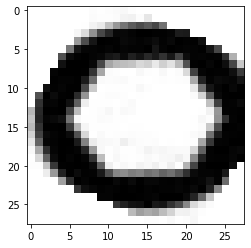

In [84]:
from random import randrange

# 0 = innensechskant
# 1 = philips
# 2 = pozidriv
# 3 = sechskant
# 4 = torx

i=randrange(len(y_train))

print(y_train[i])
plt.imshow(X_train[i].reshape(28,28),cmap='gray')
plt.show

## Formatieren

**Erklärung: weshalb formatieren?**

In [85]:
# converting X
X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

# converting list to array
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6344, 784)
(6344,)
(2720, 784)
(2720,)


In [102]:
y_train

array([1, 4, 1, ..., 1, 4, 0])

array([0., 0., 0., ..., 0., 0., 1.], dtype=float32)

## One-Hot-Encoding

y_train: werte zwischen 0 und 1, weil logistische Reg. nur in diesem Bereich arbeitet:

Wir können das Modell erstmal nur darauf trainieren, ein Objekt von anderen zu unterscheiden. Dafür müssen die Labels noch umgewandelt werden, 1 für treffer und 0 für anderes Objekt.

In [96]:
# auf eine Klasse trainieren, One-Hot-Encoding

# 0 = innensechskant
y_train_0=y_train == 0 # False,True,...
y_test_0 =y_test == 0
print(y_train_0)
      
# 1 = philips
y_train_1=y_train == 1 
y_test_1 =y_test == 1
print(y_train_1)
      
# 2 = pozidriv
y_train_2=y_train == 2 
y_test_2 =y_test == 2
print(y_train_2)
      
# 3 = sechskant
y_train_3=y_train == 3 
y_test_3 =y_test == 3
print(y_train_3)
      
# 4 = torx
y_train_4=y_train == 4
y_test_4 =y_test == 4
print(y_train_4)


# False,True,... in Werte zw. 0...1 umwandeln
y_train_0 = y_train_0.astype(np.float32) 
y_test_0 = y_test_0.astype(np.float32) 
y_train_1 = y_train_1.astype(np.float32) 
y_test_1 = y_test_1.astype(np.float32) 
y_train_2 = y_train_2.astype(np.float32) 
y_test_2 = y_test_2.astype(np.float32)
y_train_3 = y_train_3.astype(np.float32) 
y_test_3= y_test_3.astype(np.float32) 
y_train_4 = y_train_4.astype(np.float32) 
y_test_4 = y_test_4.astype(np.float32) 

print(y_train_0)
print(y_train_1)
print(y_train_2)
print(y_train_3)
print(y_train_4)

[False False False ... False False  True]
[ True False  True ...  True False False]
[False False False ... False False False]
[False False False ... False False False]
[False  True False ... False  True False]
[0. 0. 0. ... 0. 0. 1.]
[1. 0. 1. ... 1. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 1. 0. ... 0. 1. 0.]


## Modell trainieren

**Funktionen genau erläutern:**

In [106]:
from scipy.special import expit


def S(x):
    return expit(x)
    # return 1 / (1 + np.exp(-x))

# Funktion genau erklären:
def f(w, b, x):
    return S(w @ x.T + b)


def J(w, b, x, y):
    return -np.mean(y * np.log(f(w, b, x)) + \
                    (1 - y) * np.log(1 - f(w, b, x)))


def J_ableitung_w(w, b, x, y):
    e = f(w, b, x) - y
    return np.mean(x.T * e, axis=1)


def J_ableitung_b(w, b, x, y):
    return np.mean(f(w, b, x) - y)

# print(X_train.shape)
# exit()
lr = 0.01
w = np.zeros((1, 784)) # bei der NUll ist Steigung am größten->numerisch besser
b = 1
for i in range(0, 500):

    dw = J_ableitung_w(w, b, X_train, y_train_3)
    db = J_ableitung_b(w, b, X_train, y_train_3)

    w = w - lr * dw
    b = b - lr * db

    cost = J(w, b, X_train, y_train_3)
    print("Kosten: " + str(cost))

Kosten: 0.4310971394580915
Kosten: 0.3981070234677813
Kosten: 0.3772304554741302
Kosten: 0.35931371076314483
Kosten: 0.3431088305421836
Kosten: 0.328282498054063
Kosten: 0.3146635370786693
Kosten: 0.30212125834049486
Kosten: 0.2905428981288198
Kosten: 0.2798288025361028
Kosten: 0.2698907499990667
Kosten: 0.26065075827048756
Kosten: 0.2520399667691596
Kosten: 0.24399757556129792
Kosten: 0.23646986601331116
Kosten: 0.2294093180233474
Kosten: 0.22277382688996694
Kosten: 0.21652601568520183
Kosten: 0.21063263544260133
Kosten: 0.2050640440924491
Kosten: 0.19979375490039347
Kosten: 0.19479804561647532
Kosten: 0.19005562028972642
Kosten: 0.18554731656310527
Kosten: 0.18125585213153528
Kosten: 0.1771656048676166
Kosten: 0.17326242186901256
Kosten: 0.16953345334883746
Kosten: 0.16596700787526336
Kosten: 0.16255242597356168
Kosten: 0.15927996954003806
Kosten: 0.15614072489064956
Kosten: 0.15312651758548718
Kosten: 0.15022983744120474
Kosten: 0.14744377237364603
Kosten: 0.14476194990837302
Kosten

In [107]:
y_test_pred = f(w, b, X_test) > 0.5
y_test_pred = y_test_pred.reshape(-1)
y_test_pred=y_test_pred.astype(np.float32)
print(y_test_pred.shape)
print(np.mean(y_test_3 == y_test_pred))

(2720,)
1.0


## Modell Trainieren mit Torx

In [108]:
# print(X_train.shape)
# exit()
lr = 0.01
w = np.zeros((1, 784)) # bei der NUll ist Steigung am größten->numerisch besser
b = 1
for i in range(0, 500):

    dw = J_ableitung_w(w, b, X_train, y_train_4)
    db = J_ableitung_b(w, b, X_train, y_train_4)

    w = w - lr * dw
    b = b - lr * db

    cost = J(w, b, X_train, y_train_4)
    print("Kosten: " + str(cost))

Kosten: 0.5412764682099986
Kosten: 0.5222272900016737
Kosten: 0.5111212582773319
Kosten: 0.50159465182949
Kosten: 0.49303368636347117
Kosten: 0.4852827961808544
Kosten: 0.47824547091001546
Kosten: 0.47184063627035744
Kosten: 0.46599696435274696
Kosten: 0.4606515158914848
Kosten: 0.455748845630847
Kosten: 0.45124017269051975
Kosten: 0.4470826031978436
Kosten: 0.4432384185214898
Kosten: 0.4396744350212995
Kosten: 0.4363614349949419
Kosten: 0.4332736650595839
Kosten: 0.4303883965228226
Kosten: 0.4276855416327122
Kosten: 0.425147319522809
Kosten: 0.42275796592980214
Kosten: 0.42050348120150993
Kosten: 0.41837141163398484
Kosten: 0.41635065971801827
Kosten: 0.4144313194017573
Kosten: 0.412604532967604
Kosten: 0.41086236656844205
Kosten: 0.40919770186721915
Kosten: 0.4076041415756189
Kosten: 0.4060759269946556
Kosten: 0.40460786592640746
Kosten: 0.40319526955601526
Kosten: 0.4018338971008019
Kosten: 0.4005199071930079
Kosten: 0.3992498151079356
Kosten: 0.3980204550736172
Kosten: 0.3968289470

## Modell Genauigkeit

In [118]:
y_test_pred = f(w, b, X_test)# > 0.4  # 0.5 entspricht 50% Wahrscheinlichkeit, kann auch höher gesetzt werden, je nachdem wie sicher das Ergebnis sein soll
print(y_test_pred)
print(y_test_4)

[[0.39484367 0.76805655 0.05357473 ... 0.41159468 0.03374264 0.30100604]]
[0. 1. 0. ... 1. 0. 0.]


In [126]:
y_test_pred = f(w, b, X_test) > 0.5
print(y_test_pred)
print(y_test_4)

[[False  True False ... False False False]]
[0. 1. 0. ... 1. 0. 0.]


In [127]:
y_test_pred = y_test_pred.reshape(-1)
print(y_test_pred)

[False  True False ... False False False]


In [128]:
y_test_pred=y_test_pred.astype(np.float32)
print(y_test_pred)
print(y_test_pred.shape)


[0. 1. 0. ... 0. 0. 0.]
(2720,)


In [129]:
print(np.mean(y_test_4 == y_test_pred))

0.9088235294117647


**Hier wäre eine kleine Statistik schön: Wieviel Prozent macht eine Klasse am Datensatz aus.  
was sagt die Genauigkeit aus? Wie gut ist das Modell eigentlich?**

## Auswertung

**Hier die falsch erkannten Bilder groß Darstellen**

In [ ]:
nrow = 5
ncol = 5


#fig = plt.figure(figsize=(ncol+1, nrow+1)) 
fig = plt.figure(figsize=(24, 24))

im = 0
for i in range(nrow):
    for j in range(ncol):
        # convert to unsigned integers
        
        ax= plt.subplot(gs[i,j])
        ax.imshow(X_4_false[im,:,:,0].astype('uint8'),cmap='gray')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        im +=1

plt.show()

In [150]:
X_4_false.shape#(-1,28,28,1)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
X_false = []
y = []

for features,label in image_dataset:
    X_false.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [153]:
# Falsch vorhergesagte Bilder anzeigen
imgs=0

for i in range(0, len(X_test)):
    # Welche Bilder wurden falsch als Torx erkannt?
    if y_test_pred[i] == 1 and y_test_4[i] == 0:
        X_4_false=np.asarray(X_test[i].reshape(-1,28,28,1))
        plt.imshow(X_test[i].reshape(28,28),cmap='gray')
        plt.show()
        print(i)
        imgs=imgs + 1
        print(imgs)

print(imgs)

IndexError: list assignment index out of range

## Testvorhersage

**Die Log.Reg. funktioniert aber ist nicht sehr leistungsfähig,  
deshalb geht es nun mit Neuronalen Netzen weiter**